In [26]:
import numpy as np
from fipy import CellVariable, Grid2D, DiffusionTerm, Grid1D, TransientTerm, ExplicitDiffusionTerm
from fipy.tools import numerix
import matplotlib.pyplot as plt
import pickle 


epsilon = 1/10.

L = np.pi*2
nx = 200
dx = L/nx
mesh = Grid1D(nx=nx, dx=dx) - np.pi

boundary_value = 0.

var = CellVariable(mesh=mesh, name="variable", value=0.01*numerix.sin(mesh.x))

var.constrain(boundary_value, mesh.facesLeft)
var.constrain(boundary_value, mesh.facesRight)

r = numerix.cos(mesh.x/epsilon)
f = numerix.sin(2*np.pi*mesh.x)

D = 2

#eq = (DiffusionTerm(coeff=k)+numerix.sin(mesh.x)+numerix.cos(mesh.y)==0)

eq = (TransientTerm() - ExplicitDiffusionTerm(coeff=D) + 1/epsilon*r*var == f)

Nt = 5000

gt = np.zeros((nx,Nt))
for t in range(Nt):
    eq.solve(var=var, dt=2e-4)
    gt[:,t] = np.array(var)


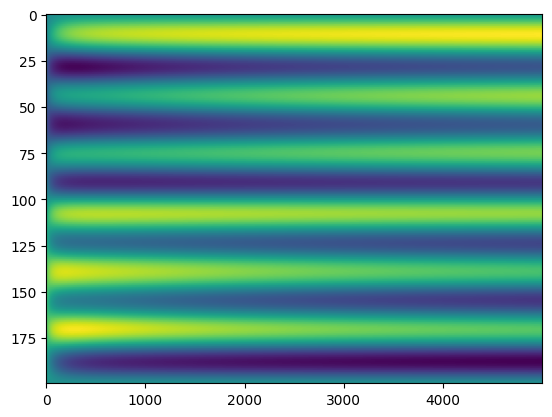

In [27]:
#gt = np.array(var)
plt.imshow(gt,aspect='auto')

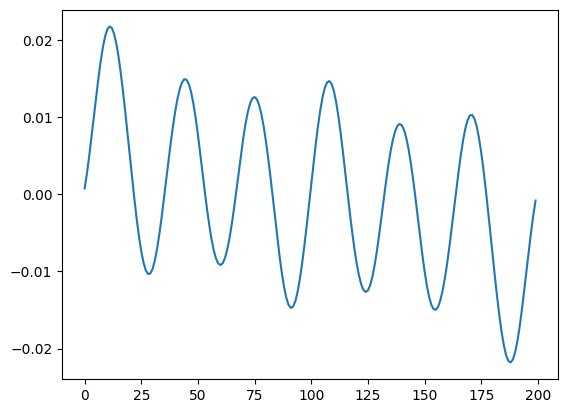

In [28]:
plt.plot(gt[:,-1])

In [29]:
with open('diff_reac_eps_1_10.pkl', 'wb') as file: 
    pickle.dump(gt, file) 

In [30]:
with open('diff_reac_eps_1_10.pkl', 'rb') as file: 
    myvar = pickle.load(file) 
  
    print(myvar) 

[[-0.00029891 -0.00031293 -0.00035404 ...  0.0007887   0.00078871
   0.00078873]
 [-0.0005819  -0.00069088 -0.00074725 ...  0.00272085  0.0027209
   0.00272095]
 [-0.00086035 -0.00093493 -0.00100836 ...  0.00494111  0.00494119
   0.00494127]
 ...
 [ 0.00086035  0.00093493  0.00100836 ... -0.00494111 -0.00494119
  -0.00494127]
 [ 0.0005819   0.00069088  0.00074725 ... -0.00272085 -0.0027209
  -0.00272095]
 [ 0.00029891  0.00031293  0.00035404 ... -0.0007887  -0.00078871
  -0.00078873]]


In [31]:
myvar_short = myvar[:,9::10]
print(myvar_short.shape)

(200, 500)


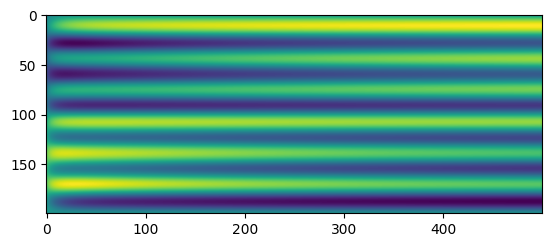

In [32]:
plt.imshow(myvar_short)

In [33]:
with open('diff_reac_eps_1_10.pkl', 'wb') as file: 
    pickle.dump(myvar_short, file) 